# Немного готовим данные

In [ ]:
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

import pickle  # Пакет для подгрузки данных специфического для питона формата

In [2]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по стенке человека
df_wall = pd.read_csv('vk_data_wall.csv',sep='\t')

# В этой табличке лежат данные по фоткам человека
df_photo = pd.read_csv('vk_data_photo.csv',sep='\t')

# Размерности
df_photo.shape, df_wall.shape, df_profile.shape

((426, 18), (426, 40), (426, 68))

In [3]:
# В этом словарике инфа о том кто у кого в друзьях
with open('vk_data_friends', 'rb') as f:
    friends_dict = pickle.load(f)

In [4]:
# В этом словарике id сообществ, на которые подписаны ребятки
with open('vk_data_publ', 'rb') as f:
    publics_dict = pickle.load(f)

# Небольшая предобработочка 

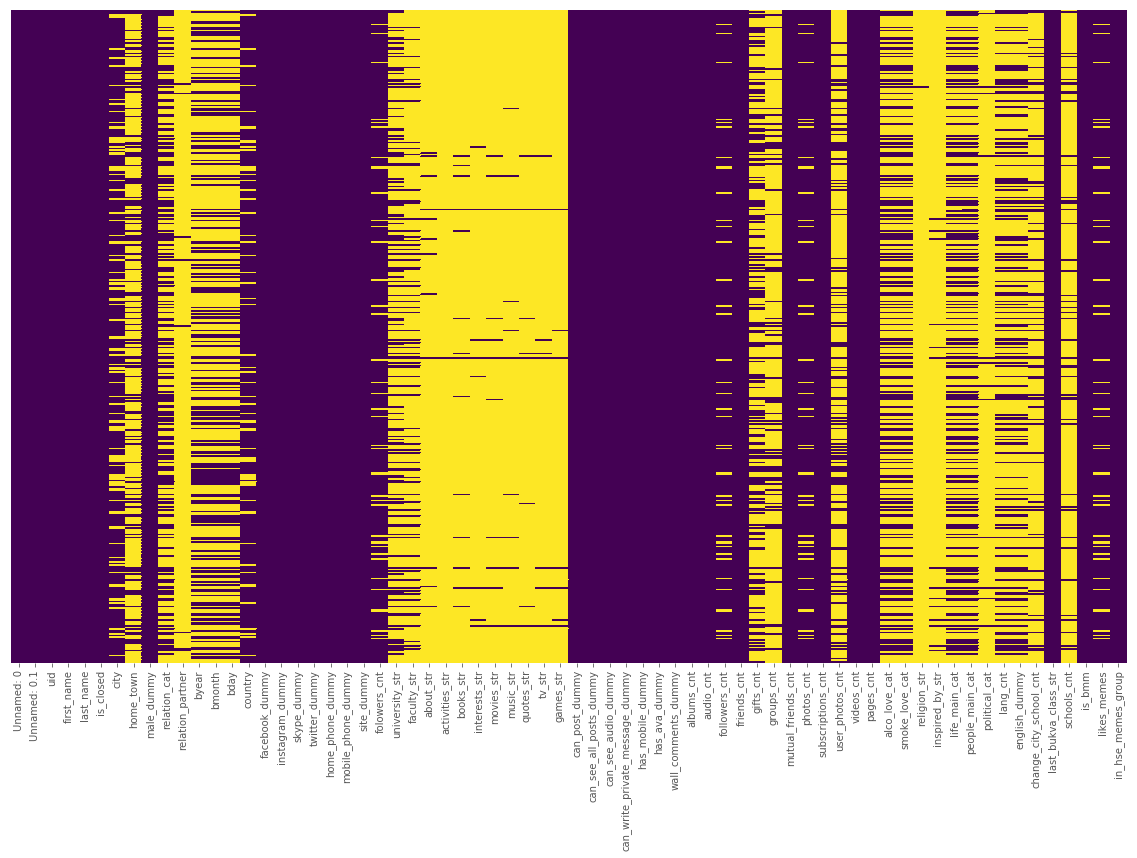

In [5]:
# пропуски в данных 
ig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_profile.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
drop_vars = ['last_bukva_class_str', 'Unnamed: 0', 'Unnamed: 0.1', 'bday', 'bmonth', 'byear', 
             'relation_partner', 'mutual_friends_cnt' ]
df_profile.drop(drop_vars, axis=1, inplace=True)

In [7]:
var_dm =  [item for item in df_profile.columns if item[-5:] == 'dummy']
var_cnt = [item for item in df_profile.columns if item[-3:] == 'cnt']
var_cat = [item for item in df_profile.columns if item[-3:] == 'cat']
var_str =  [item for item in df_profile.columns if item[-3:] == 'str']  # от них избавился 

var_other = sorted(set(df_profile.columns) - set(var_dm) - set(var_str) - set(var_cnt) - set(var_cat))

In [8]:
df_main = pd.DataFrame()

df_main[var_other] = df_profile[var_other]
df_main[var_dm] = df_profile[var_dm].fillna(0).astype(int)
df_main[var_cnt] = df_profile[var_cnt]
df_main[var_cat] = df_profile[var_cat]

Теперь переменные по стене.

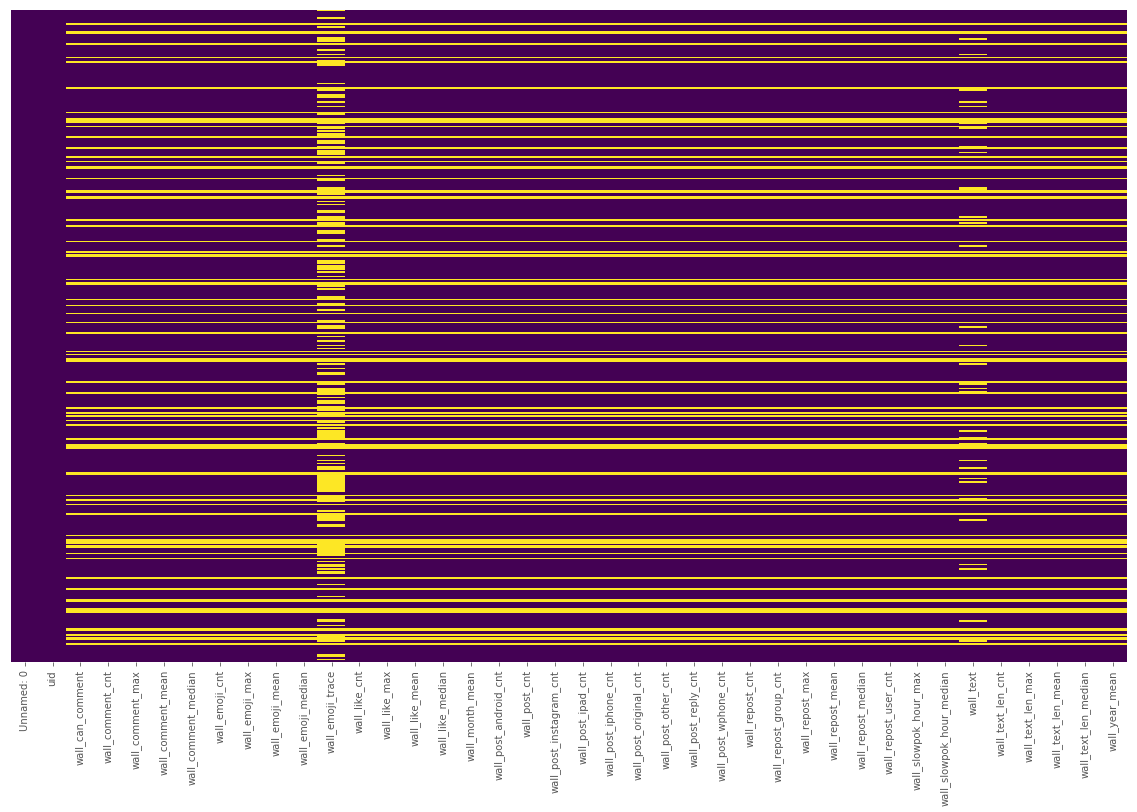

In [9]:
ig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_wall.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df_main['private_prof_dummy'] = df_wall['wall_can_comment'].isnull().astype(int)
df_main['wall_can_comment_dummy'] = df_wall['wall_can_comment']

wall_vars = ['wall_comment_cnt', 'wall_comment_max', 'wall_comment_mean', 'wall_comment_median',
        'wall_emoji_mean', 'wall_emoji_median', 'wall_emoji_cnt', 'wall_emoji_max',
        'wall_like_cnt', 'wall_like_max', 'wall_like_mean', 'wall_like_median',
        'wall_month_mean',  'wall_post_android_cnt', 'wall_post_cnt',
        'wall_post_instagram_cnt', 'wall_post_ipad_cnt', 'wall_post_iphone_cnt',
        'wall_post_original_cnt', 'wall_post_other_cnt', 'wall_post_reply_cnt',
        'wall_post_wphone_cnt', 'wall_repost_cnt', 'wall_repost_group_cnt',
        'wall_repost_max', 'wall_repost_mean', 'wall_repost_median',
        'wall_repost_user_cnt', 'wall_text_len_cnt',
        'wall_text_len_max', 'wall_text_len_mean', 'wall_text_len_median',
        'wall_year_mean','wall_emoji_trace',  'wall_text']
df_main[wall_vars] = df_wall[wall_vars]

То же самое к фоткам

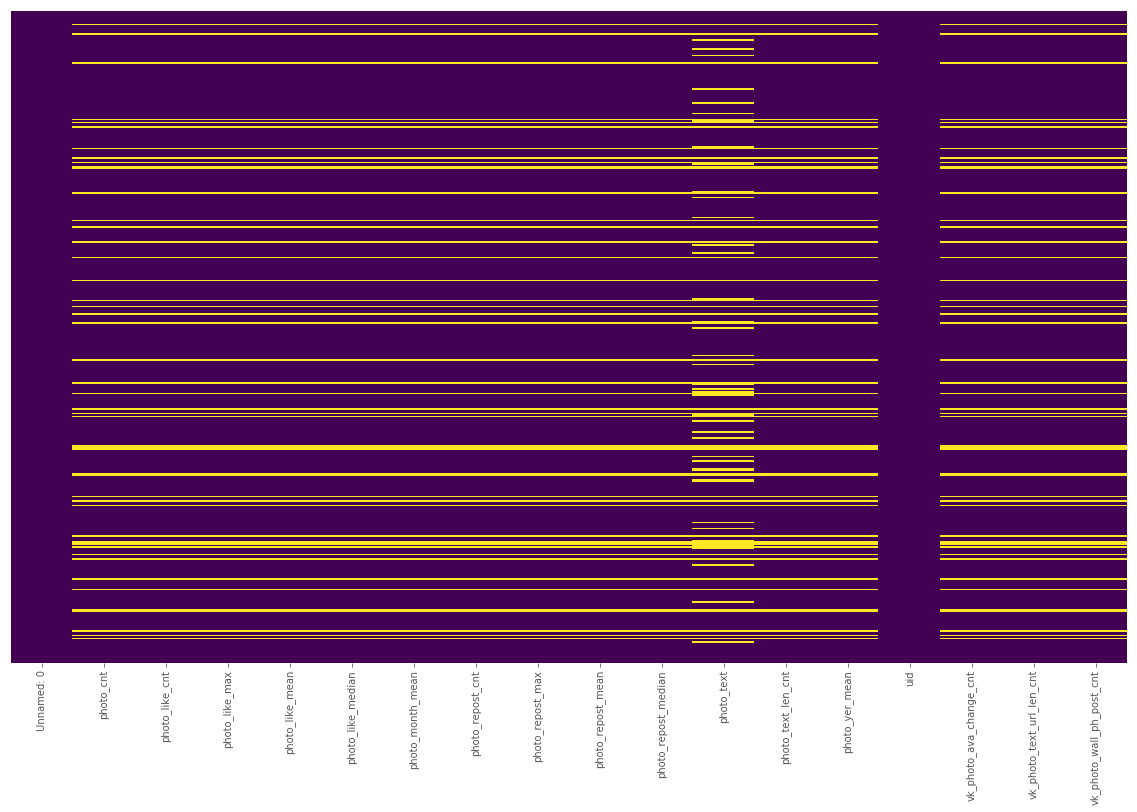

In [11]:
ig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_photo.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
ph_vars = ['photo_like_cnt', 'photo_like_max',
       'photo_like_mean', 'photo_like_median', 'photo_month_mean',
       'photo_repost_cnt', 'photo_repost_max', 'photo_repost_mean',
       'photo_repost_median',  'photo_text_len_cnt']


df_main[ph_vars] = df_photo[ph_vars]

df_main['photo_ava_change_cnt'] = df_photo['vk_photo_ava_change_cnt']
df_main['photo_text_url_len_cnt'] = df_photo['vk_photo_text_url_len_cnt']

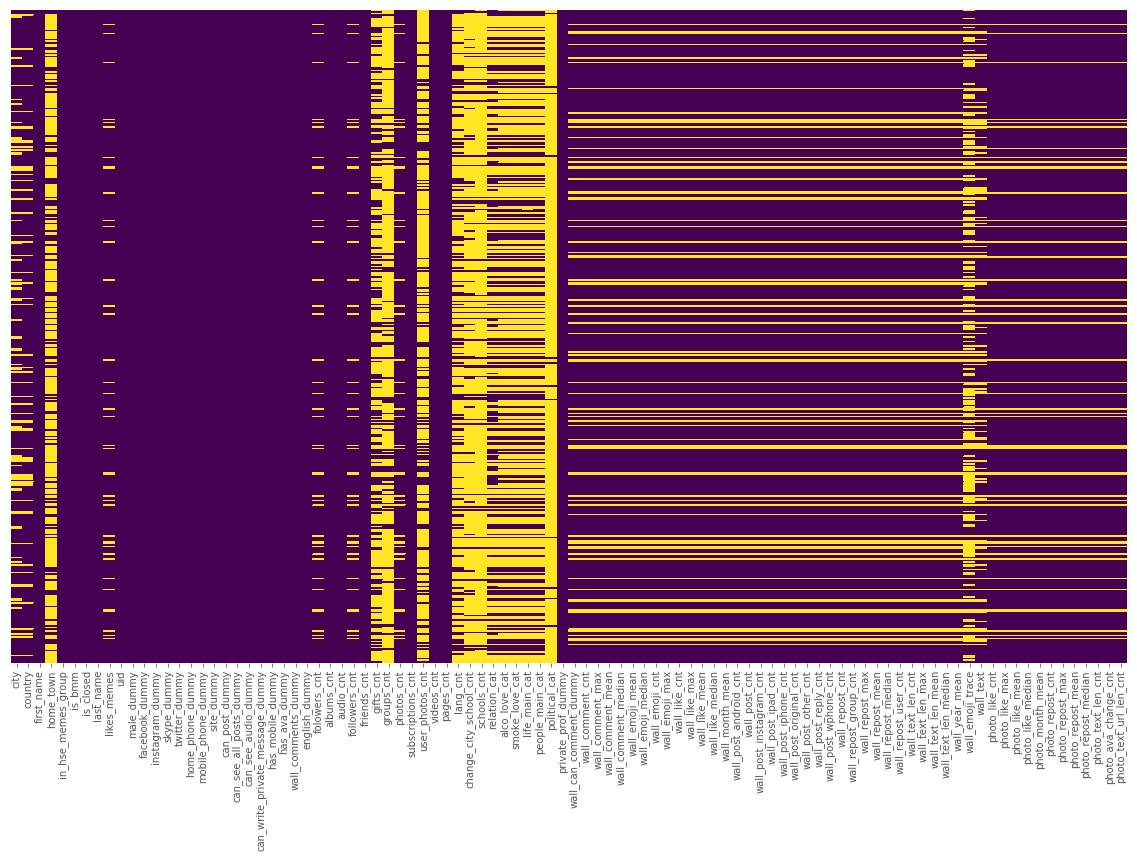

In [13]:
# пропуски в данных 
ig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_main.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Переменные по друзьям.

In [14]:
friends_cnt = [ ]
friends_mail_pct = [ ]

for item in df_main.uid:
    if friends_dict[item][0] == 'private_profile':
        friends_cnt.append(None)
        friends_mail_pct.append(None)
    else:
        friends_cnt.append(len(friends_dict[item]))
        friends_mail_pct.append(np.mean([df_main[df_main.uid == jtem].male_dummy.iloc[0] 
                                         for jtem in friends_dict[item]]))
 

In [15]:
df_main['friends_from_course_cnt'] = friends_cnt
df_main['friends_mail_from_course_pct'] = friends_mail_pct

In [16]:
df_main.to_csv('vk_main.csv', sep='\t', index=False)

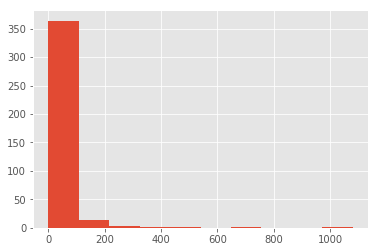

In [17]:
df_main.likes_memes.hist()

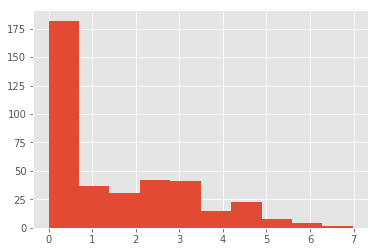

In [18]:
df_main.likes_memes.apply(lambda w: np.log(w) if w != 0 else 0).hist()

In [19]:
np.mean(df_main.likes_memes > 0)

0.6126760563380281